In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 

In [52]:
def plot_rectangles(img_path, targets, predicted):
    # Carregar a imagem
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Criar a figura e o eixo
    fig, ax = plt.subplots(figsize=(20, 20))

    # Mostrar a imagem
    ax.imshow(img)

    # Adicionar retângulos dos targets
    for target in targets:
        target_rect = patches.Rectangle((target[0], target[1]), 
                                        target[2] - target[0], 
                                        target[3] - target[1], 
                                        linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(target_rect)
        
        # Adicionar coordenadas próximas aos cantos dos targets
        target_corners = [(target[0], target[1]), (target[2], target[3])]
        for corner in target_corners:
            ax.text(corner[0], corner[1], f"({corner[0]:.1f}, {corner[1]:.1f})", color='white', fontsize=10, ha='left')

    # Adicionar retângulos das predições
    for pred in predicted:
        predicted_rect = patches.Rectangle((pred[0], pred[1]), 
                                           pred[2] - pred[0], 
                                           pred[3] - pred[1], 
                                           linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(predicted_rect)
        
        # Adicionar coordenadas próximas aos cantos das predições
        predicted_corners = [(pred[0], pred[1]), (pred[2], pred[3])]
        for corner in predicted_corners:
            ax.text(corner[0], corner[1], f"({corner[0]:.1f}, {corner[1]:.1f})", color='white', fontsize=10, ha='left')

    # Configurar os limites dos eixos e inverter o eixo y
    ax.set_xlim(0, img.shape[1])
    ax.set_ylim(img.shape[0], 0)

    # Configurar o título e rótulos dos eixos
    ax.set_title('Target and Predicted Bounding Boxes')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

    # Configurar os eixos para ficarem em cima
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    # Mostrar a imagem com os retângulos
    plt.show()

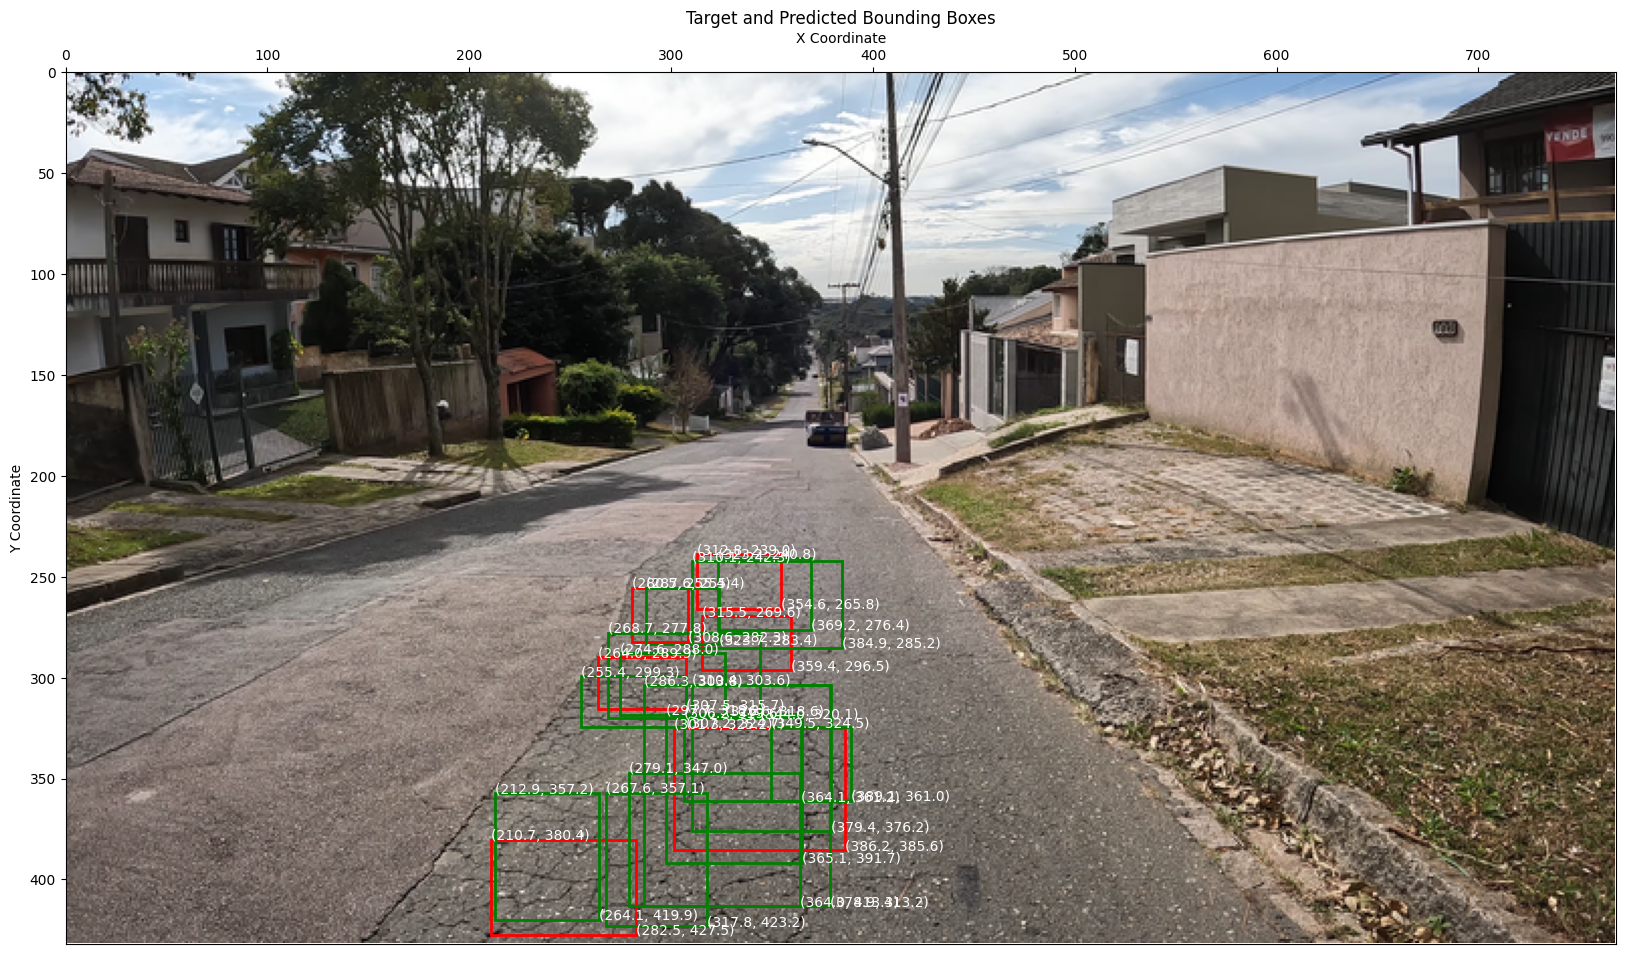

In [63]:
import torch

# Exemplo de uso
img_path = 'd:/python/tcc1/test_images/GX010061.MP4_0.png'
targets = torch.tensor([
    [301.3420, 325.1880, 386.2460, 385.5920],
    [315.4920, 269.6400, 359.4240, 296.4640],
    [210.7340, 380.3960, 282.5440, 427.4960],
    [312.8320, 238.9740, 354.6500, 265.7960],
    [280.5180, 255.4480, 308.6080, 282.2700],
    [263.9580, 289.9160, 307.4680, 315.6840]
])
predicted = torch.tensor([
[212.8895, 357.2403, 264.0724, 419.8962],
           [306.1805, 319.6498, 364.1373, 361.2497],
           [310.1006, 242.3167, 384.8643, 285.2103],
           [267.6021, 357.1361, 317.7966, 423.2091],
           [297.6996, 318.2273, 365.0678, 391.6990],
           [286.3482, 303.8369, 378.9072, 413.1872],
           [274.5851, 287.9689, 326.6427, 318.5630],
           [310.3777, 303.6225, 379.4059, 376.2309],
           [323.1632, 240.8162, 369.2358, 276.3928],
           [349.4995, 324.4906, 389.0562, 361.0286],
           [255.3685, 299.3122, 307.2010, 324.6542],
           [268.6656, 277.7756, 344.0170, 320.0616],
           [287.6162, 255.4390, 323.6655, 283.4457],
           [279.1113, 347.0441, 363.9500, 413.3144]
])
plot_rectangles(img_path, targets, predicted)
